In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Advertising.csv')

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper'] + df['sales']

In [12]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,359.2
1,44.5,39.3,45.1,10.4,139.3
2,17.2,45.9,69.3,9.3,141.7
3,151.5,41.3,58.5,18.5,269.8
4,180.8,10.8,58.4,12.9,262.9
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,63.3
196,94.2,4.9,8.1,9.7,116.9
197,177.0,9.3,6.4,12.8,205.5
198,283.6,42.0,66.2,25.5,417.3


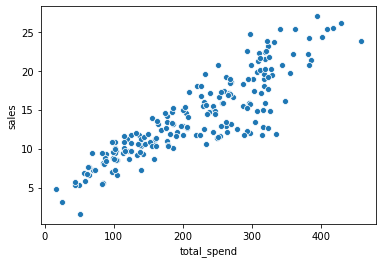

In [15]:
sns.scatterplot(data = df,x = 'total_spend',y = 'sales')

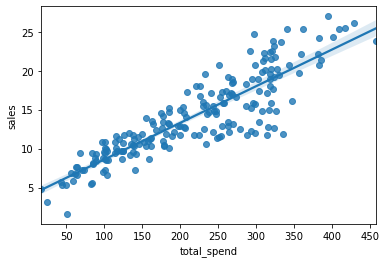

In [16]:
sns.regplot(data = df,x = 'total_spend',y = 'sales')

In [23]:
X = df['total_spend']
y = df['sales']


In [26]:
np.polyfit(X,y,deg = 1)

array([0.04710145, 3.90119955])

In [27]:
#y = B1X + B0
test_cost = np.linspace(0,400,100)
test_sales = 0.04710145*test_cost + 3.90119955

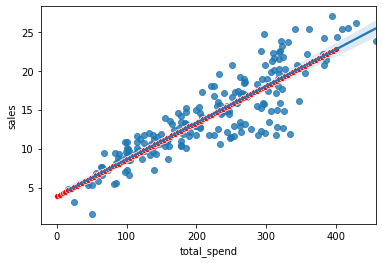

In [33]:
sns.regplot(data = df,x = 'total_spend',y = 'sales')
sns.scatterplot(test_cost,test_sales,color = 'red')

In [35]:
sns

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,359.2
1,44.5,39.3,45.1,10.4,139.3
2,17.2,45.9,69.3,9.3,141.7
3,151.5,41.3,58.5,18.5,269.8
4,180.8,10.8,58.4,12.9,262.9


In [38]:
X = df.drop(['sales','total_spend'],axis = 1)

In [39]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [40]:
y = df['sales']

In [41]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101 )

In [48]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [54]:
predictions = model.predict(X_test)

In [56]:
pd.DataFrame(predictions, columns = ['Predictions'])

,Predictions
0,15.741313
1,19.610626
2,11.448889
3,17.008198
4,9.172857
5,7.012483
6,20.289925
7,17.299540
8,9.775845
9,19.221942


In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
df['sales'].mean()

14.022500000000003

df['sales']

In [61]:
mean_absolute_error(y_test,predictions)

1.213745773614481

In [62]:
mean_squared_error(y_test,predictions)

2.2987166978863782

In [64]:
np.sqrt(mean_squared_error(y_test,predictions))

1.516151937599388

In [66]:
final_model = LinearRegression()

In [67]:
final_model.fit(X,y)

LinearRegression()

In [86]:
new_mod = LinearRegression()
new_mod.fit(X.drop(199),y.drop(199))

LinearRegression()

In [90]:
X.iloc[[198,199]]

,TV,radio,newspaper
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [93]:
preds = new_mod.predict(X)

In [99]:
(((y - preds)**2).sum())**0.5/len(y)

0.11799200345837439

In [68]:
from joblib import dump,load

In [69]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [71]:
quartet = pd.read_csv('anscombes_quartet1.csv')

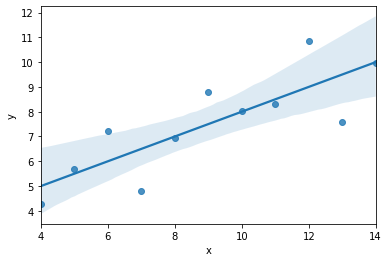

In [76]:
sns.regplot(quartet['x'],quartet['y'])

In [80]:
np.polyfit(quartet['x'],quartet['y'],deg = 1)

array([0.50009091, 3.00009091])